In [1]:
from mcmr_crosstalk_comp_basis import MCMR_Crosstalk_Comp_Basis_Experiment
from selene_sim import DepolarizingErrorModel, Stim, Quest
from pecos_selene import PecosGeneralErrorModel

In [2]:
from collections import Counter
from hugr.qsystem.result import QsysResult
from selene_sim import build, Stim
from pecos_selene import qsystem_model_alpha
from selene_anduril import AndurilRuntimePlugin as AndurilRuntime
from selene_sim import SimpleLeakageErrorModel
from selene_eldarion import register_eldarion, QtmPlatformPlugin
register_eldarion()

In [3]:
# index of focus qubit(s) that receives repeated MCMR.  Must be chosen from the zone qubits (q[0:15]) .  
focus_qubits = [0,2,4,6,8,10,12,14]

seq_lengths = [1, 100] #  intermediate shot lengths needed to resolve possible quadratic dependencies (memory error).

# datetime labelling ensures that the pickle filename is unique and informative.
import datetime
x = datetime.datetime.now()
filename = f'./exp_MCMR_Crosstalk_comp_basis_q{focus_qubits}_{x}.p'
print(filename)

exp = MCMR_Crosstalk_Comp_Basis_Experiment(focus_qubits, seq_lengths, filename=filename)
exp.add_settings()

./exp_MCMR_Crosstalk_comp_basis_q[0, 2, 4, 6, 8, 10, 12, 14]_2025-10-21 18:00:38.614950.p


In [3]:
# or load an existing experiment from working directory

filename = f'./exp_MCMR_Crosstalk_comp_basis_q[0, 2, 4, 6, 8, 10, 12, 14]_2025-10-21 18:00:38.614950.p'
exp = MCMR_Crosstalk_Comp_Basis_Experiment.load(filename)

### Run local simulation using Selene

In [4]:
# Setup error model

error_model = PecosGeneralErrorModel(
        p_meas_crosstalk=1e-4,
        p_prep_crosstalk=1e-4
    )

# error_model = qsystem_model_alpha(random_seed=12, p_meas_crosstalk=1e-2,p_prep_crosstalk=1e-2)


In [5]:
# simulate experiment

shots = 100
simulator = Stim()

exp.sim(shots, error_model = error_model, simulator=simulator)


Simulating ...


SelenePanicError: Panic (#100001): ErrorModelPlugin: handle_operations failed
----- stderr -----
Error: Failed to handle operations
unknown variant `ProtectedMeasureLeakedSetup`, expected one of `ResetBYYB`, `Reset`, `Rxy`, `Rzz`, `Sleep`, `ProtectedMeasureSetup`, `ProtectedMeasureCleanup`, `Measure`, `MeasureLeaked`, `Relabeling`, `Transport`
Error: Failed to handle operations
unknown variant `ProtectedMeasureLeaked`, expected one of `ResetBYYB`, `Reset`, `Rxy`, `Rzz`, `Sleep`, `ProtectedMeasureSetup`, `ProtectedMeasureCleanup`, `Measure`, `MeasureLeaked`, `Relabeling`, `Transport`
[interface] error: Error ending shot 0: error code 100001

------------------


### Submit to Quantinuum Hardware or Emulator backend using Nexus

In [4]:
import qnexus

In [5]:
# Choose domain and login to Nexus

import qnexus

### uncomment lines below if submitting to QA ###
#from qnexus.config import CONFIG
#CONFIG.domain = "qa.myqos.com"

qnexus.login_with_credentials()

Enter your Nexus email:  victor.colussi@quantinuum.com
Enter your Nexus password:  ········


✅ Successfully logged in as victor.colussi@quantinuum.com.


In [5]:
# choose nexus project

project = qnexus.projects.get_or_create(name='MCMR-crosstalk-example-project')
qnexus.context.set_active_project(project)

In [ ]:
# Simualtion:  setup quantinuum backend config


# device_name = 'Helios-1' to submit to hardware.
# stabilizer sim needed for 98 qubit job.
backend_config = qnexus.QuantinuumConfig(device_name='Helios-1E', simulator='stabilizer', max_cost=1000000) 

In [6]:
# Hardware:  setup quantinuum backend config
from quantinuum_schemas.models.backend_config import QuantinuumCompilerOptions

priority = 'high'
compiler_options = QuantinuumCompilerOptions(priority=priority)
backend_config = qnexus.QuantinuumConfig(device_name='Helios-1', compiler_options=compiler_options, max_cost=1000000)

In [7]:
# submit experiment. Returns a qnexus ExecuteJobRef

shots = 1000

execute_job_ref = exp.submit(shots, backend_config)

Experiment saved! ./exp_MCMR_Crosstalk_comp_basis_q[0, 2, 4, 6, 8, 10, 12, 14]_2025-10-21 18:00:38.614950.p


In [14]:
# inspect status of the execution job

qnexus.jobs.status(execute_job_ref)

JobStatus(status=<StatusEnum.COMPLETED: 'Circuit has completed. Results are ready.'>, message='The job is completed.', error_detail=None, completed_time=datetime.datetime(2025, 10, 22, 5, 25, 5, 956111, tzinfo=datetime.timezone.utc), queued_time=datetime.datetime(2025, 10, 22, 0, 2, 23, 485000, tzinfo=datetime.timezone.utc), submitted_time=datetime.datetime(2025, 10, 22, 0, 0, 56, 646881, tzinfo=datetime.timezone.utc), running_time=datetime.datetime(2025, 10, 22, 2, 24, 36, 131201, tzinfo=datetime.timezone.utc), cancelled_time=None, error_time=None, queue_position=None)

In [15]:
# retrieve results

exp.retrieve(execute_job_ref)

Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider updating your pytket version.
Unknown OpType in BackendInfo: `%`, will omit from BackendInfo. Consider 

Experiment saved! ./exp_MCMR_Crosstalk_comp_basis_q[0, 2, 4, 6, 8, 10, 12, 14]_2025-10-21 18:00:38.614950.p


### Retrieve experiment results

/Users/victor.colussi/Documents/Github_Repos/circuit-benchmarks-guppy/mcmr_crosstalk_comp_basis.py:653: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(fit_func, x, y) #, p0=[0.4, 0.9], bounds=([0,0], [0.5,1]))
/Users/victor.colussi/Documents/Github_Repos/circuit-benchmarks-guppy/mcmr_crosstalk_comp_basis.py:247: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(fit_func, x, y)


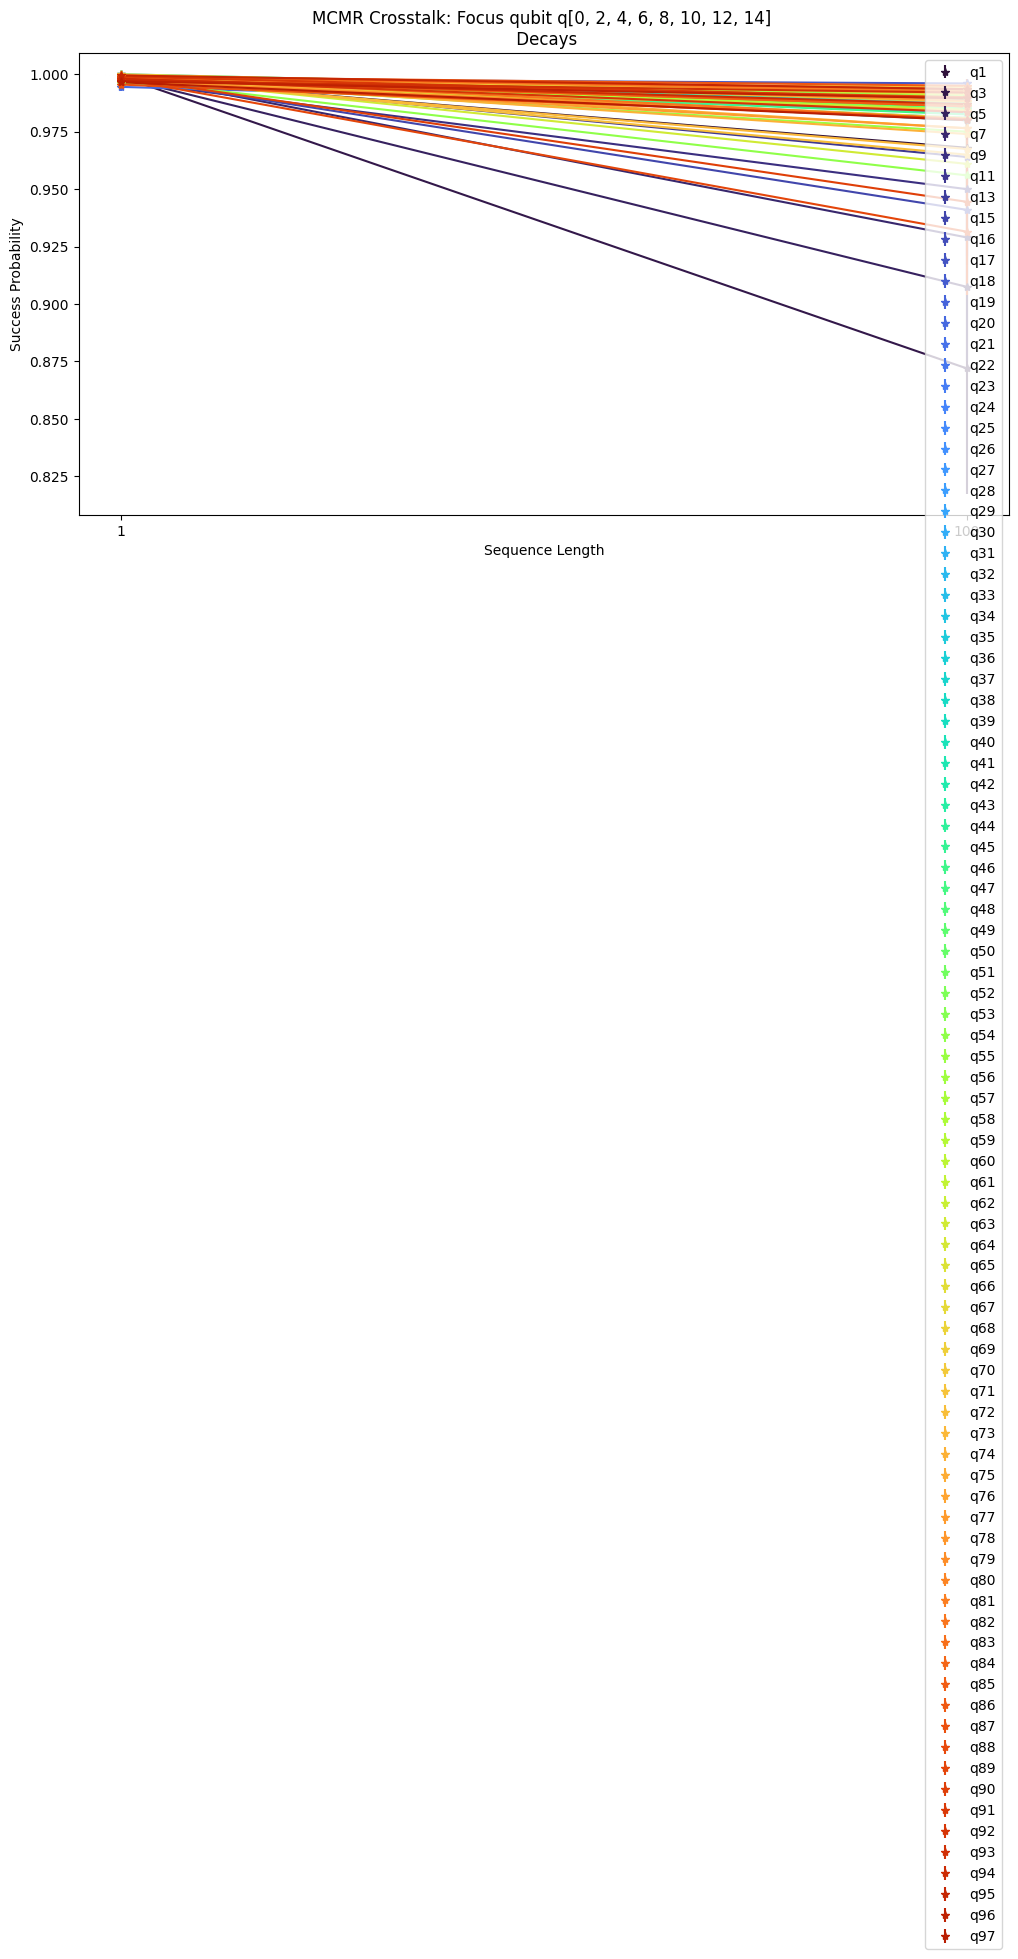

------------------------------
Qubit Average Failure: 0.000176 +/- 1.1e-05


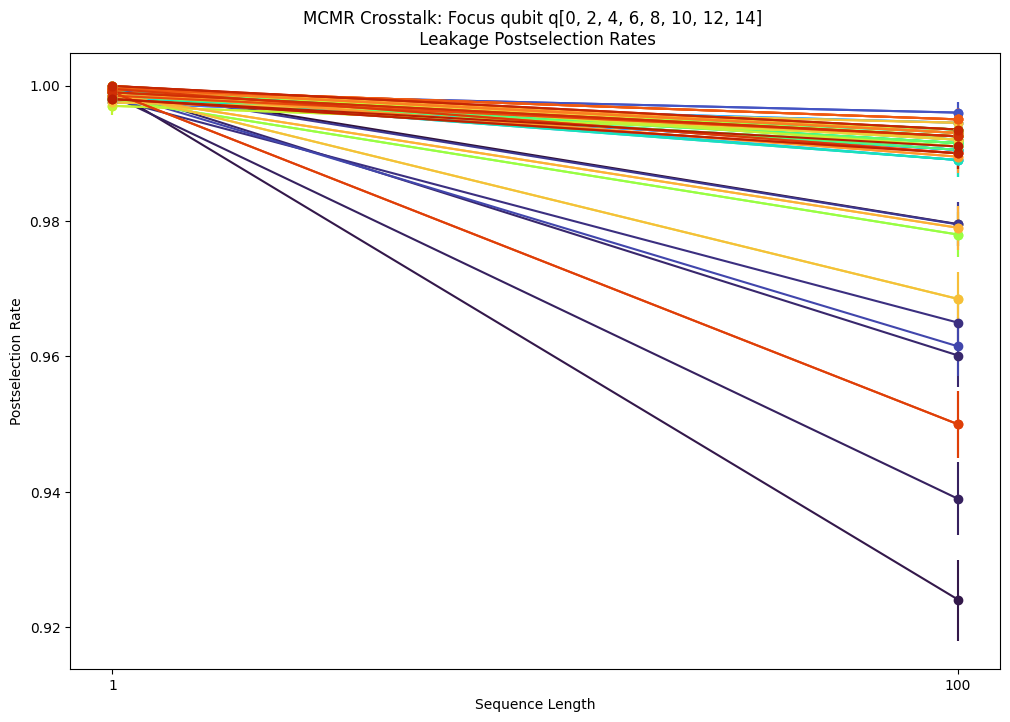

------------------------------
Qubit average leakage rate: 0.000115 +/- 3e-06






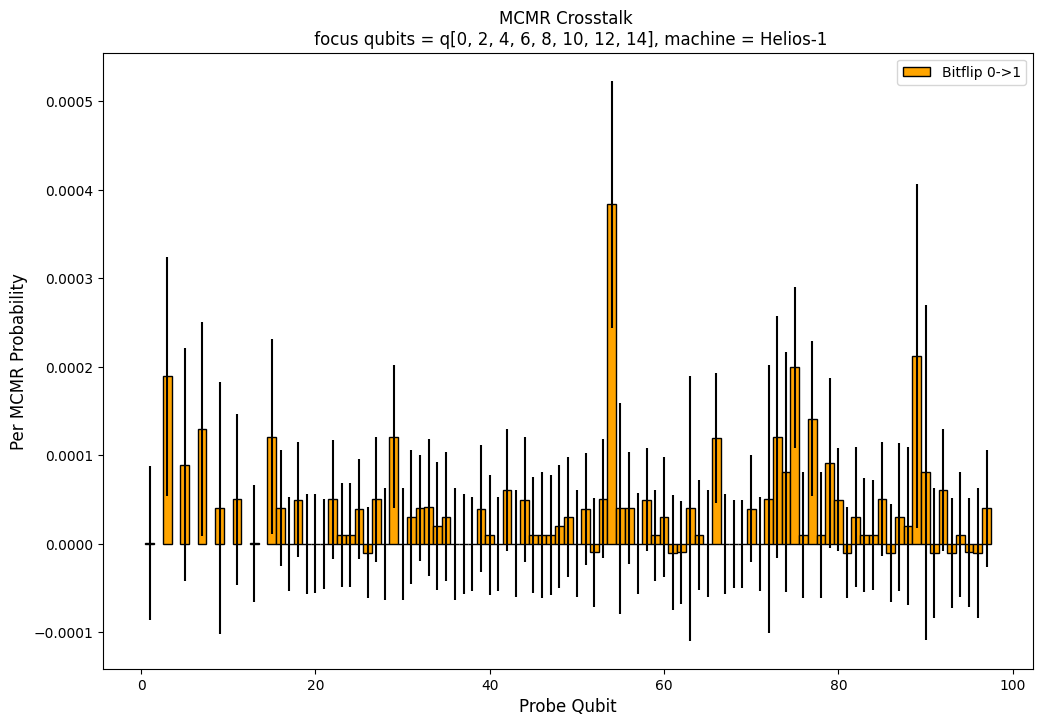

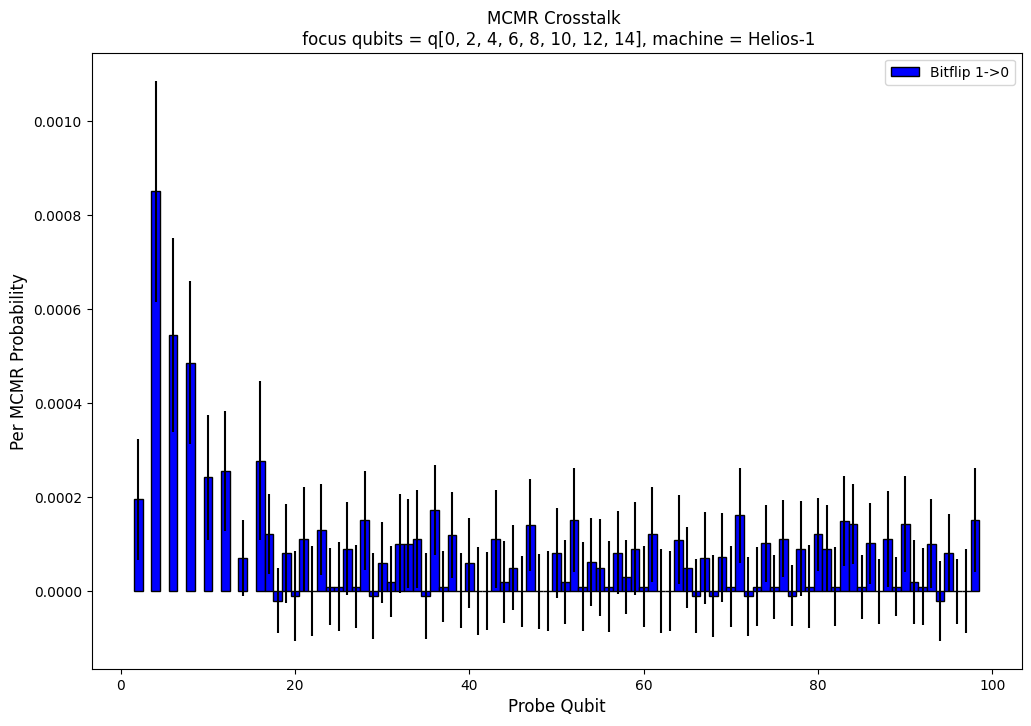

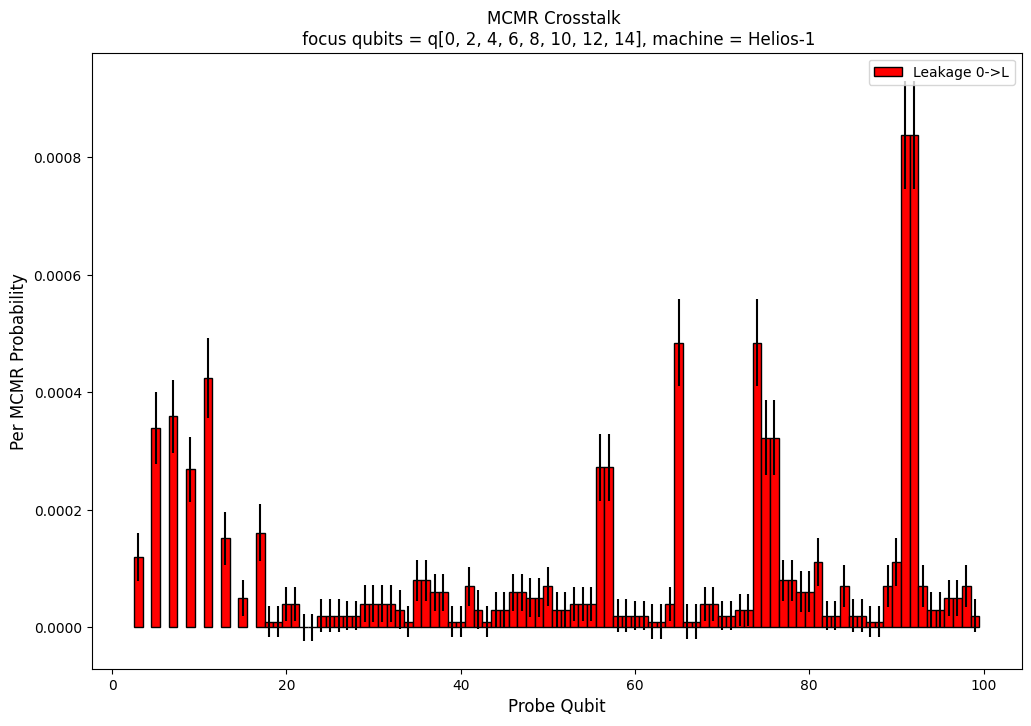

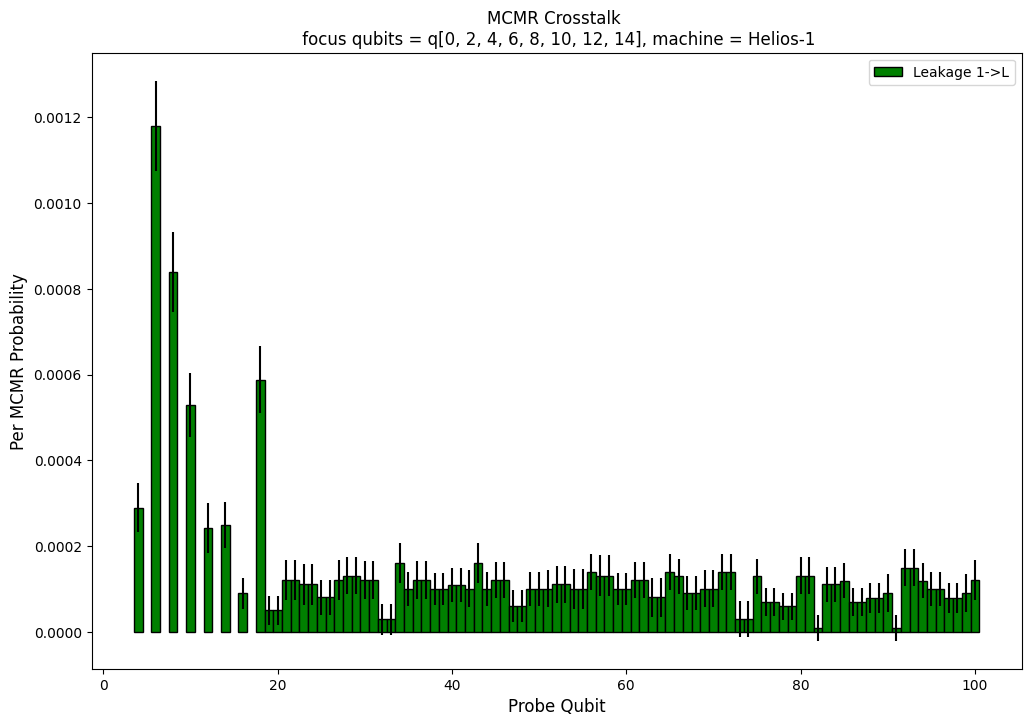

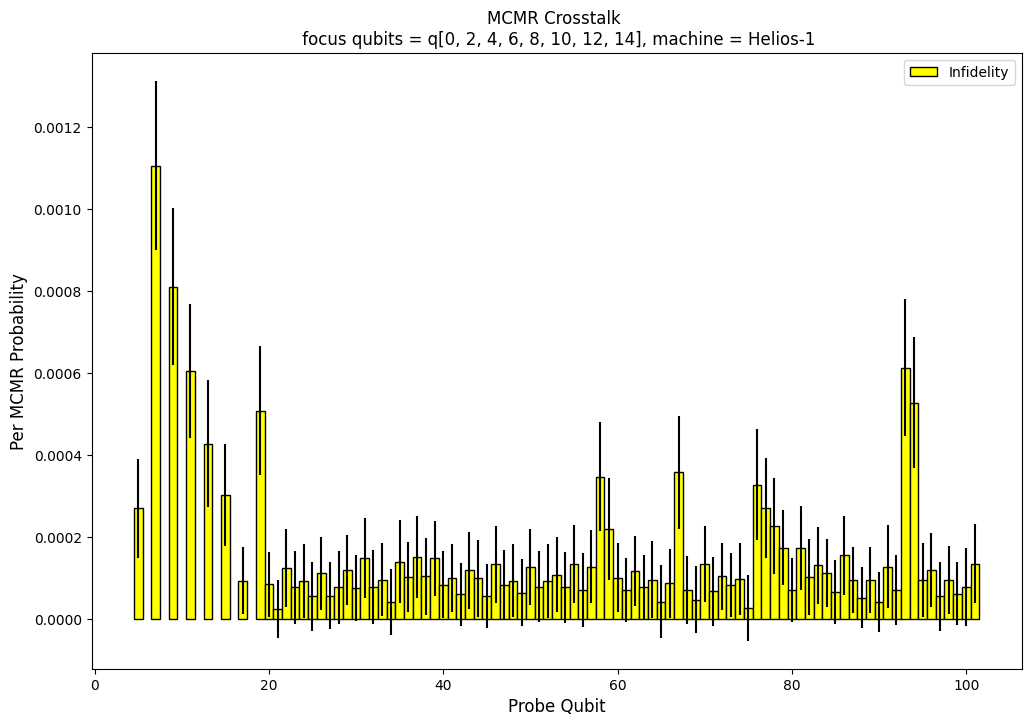

Average error rates
--------------------------------------------------
Bitflip 0->1: 3.9e-05 +/- 9e-06
Bitflip 1->0: 8.2e-05 +/- 1e-05
Leakage 0->L: 9.4e-05 +/- 4e-06
Leakage 1->L: 0.000136 +/- 5e-06
--------------------------------------------------


Error channel estimates of fidelities
--------------------------------------------------
Average state infidelity:  0.000155 +/- 1.1e-05
--------------------------------------------------


In [4]:
# qubits 0-15 reflect crosstalk in the gatezone.
# qubits 16-97 reflect crosstalk in the gatezone.

# perhaps there's a more elegant way to give the results that breaks it up into gatezone/ring...
exp.analyze_results(verbose = False)

In [25]:
# individual error channels and infidelity for each qubit.  to be included into module in concise way.

labels = ['Bitflip 0->1','Bitflip 1->0','Leakage 0->L','Leakage 1->L', 'Infidelity']


n_probe = len(exp.probe_qubits)
ind = 4 # which error channel do you want to print.

print(f'{labels[ind]}\n' + '-'*50)
for i in range(n_probe):
    q = exp.probe_qubits[i]
    if labels == 'Infidelity':
        print(f'qubit {q}: {round(exp.state_fidelity[i],6)} +/- {round(exp.state_fidelity_std[i],6)}')
    else:
        print(f'qubit {q}: {round(exp.error_channels[ind][i],6)} +/- {round(exp.error_channels_stds[ind][i],6)}')

Infidelity
--------------------------------------------------
qubit 1: 0.000205 +/- 4.9e-05
qubit 3: 0.000759 +/- 8.3e-05
qubit 5: 0.000599 +/- 7.8e-05
qubit 7: 0.000399 +/- 6.5e-05
qubit 9: 0.000333 +/- 6.3e-05
qubit 11: 0.000201 +/- 5e-05
qubit 13: 7e-05 +/- 3.3e-05
qubit 15: 0.000375 +/- 6.3e-05
qubit 16: 3e-05 +/- 3e-05
qubit 17: 3e-05 +/- 3e-05
qubit 18: 8.1e-05 +/- 3.8e-05
qubit 19: 8.1e-05 +/- 3.8e-05
qubit 20: 5.6e-05 +/- 3.5e-05
qubit 21: 5.6e-05 +/- 3.5e-05
qubit 22: 5.1e-05 +/- 3.4e-05
qubit 23: 5.1e-05 +/- 3.4e-05
qubit 24: 7.1e-05 +/- 3.8e-05
qubit 25: 7.6e-05 +/- 3.4e-05
qubit 26: 7.6e-05 +/- 3.4e-05
qubit 27: 8.1e-05 +/- 3.8e-05
qubit 28: 8.1e-05 +/- 3.8e-05
qubit 29: 3.5e-05 +/- 3.4e-05
qubit 30: 3.5e-05 +/- 3.4e-05
qubit 31: 9.6e-05 +/- 4e-05
qubit 32: 5.6e-05 +/- 3.3e-05
qubit 33: 0.000101 +/- 4e-05
qubit 34: 0.000101 +/- 4e-05
qubit 35: 8e-05 +/- 3.5e-05
qubit 36: 8e-05 +/- 3.5e-05
qubit 37: 6e-05 +/- 3.3e-05
qubit 38: 6e-05 +/- 3.3e-05
qubit 39: 8.5e-05 +/- 3.8e-05


In [26]:
# save experiment object to working directory

exp.save()

Experiment saved! ./exp_MCMR_Crosstalk_comp_basis_q[0, 2, 4, 6, 8, 10, 12, 14]_2025-10-21 18:00:38.614950.p


In [10]:
# (Optional) generate dfl
# requires qmcparser:  https://co41-bitbucket.honeywell.lab:4443/projects/TBC/repos/qmcparser/browse

from qmcparser.parser import get_dfl

# I like to make a subfolder for dfl.
output_filename = f'./dfl/dfl_MCMR_Crosstalk_Comp_Basis_q{focus_qubits}_{x}.cl'
print(output_filename)

# which circuit do you want the dfl for?
job_ind = -1
dfl = get_dfl(exp.make_circuit(exp.settings[job_ind]), output_file_name=output_filename)

./dfl/dfl_MCMR_Crosstalk_Comp_Basis_q[0, 2, 4, 6, 8, 10, 12, 14]_2025-10-21 18:00:38.614950.cl
Processing shot 0
